In [342]:
if True:
    from pandas import read_csv
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import rcParams, rc, colors

    # print(rcParams.keys())

    rc('font', weight='bold')
    rcParams['figure.figsize'] = (6, 5)
    rcParams['font.family'] = 'Times New Roman'
    rcParams['font.size'] = 20
    rcParams['xtick.labelsize'] = 16
    rcParams['ytick.labelsize'] = 16
    rcParams['legend.fontsize'] = 16

    rcParams['axes.linewidth'] = 1.5
    rcParams['lines.linewidth'] = 3

    for tick in ['xtick', 'ytick']:
        rcParams[tick+'.major.width'] = 1.5
        rcParams[tick+'.minor.width'] = 1
        rcParams[tick+'.major.size'] = 8
        rcParams[tick+'.minor.size'] = 5

    # Read data
    ch_data = read_csv('main_out/charge_capacities.txt', names=['cap'])
    disch_data = read_csv('main_out/discharge_capacities.txt', names=['cap'])
    ce_data = read_csv('main_out/coulombic_efficiencies.txt', names=['CE'])

    def colorFader(c1,c2,mix=0):
        """
        Function to interpolate between two chosen colors.
        fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
        """
        c1=np.array(colors.to_rgb(c1))
        c2=np.array(colors.to_rgb(c2))
        return colors.to_hex((1-mix)*c1 + mix*c2)

See https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html for linestyles.

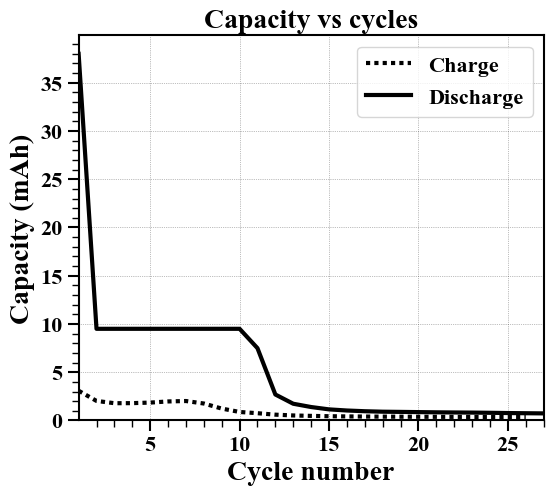

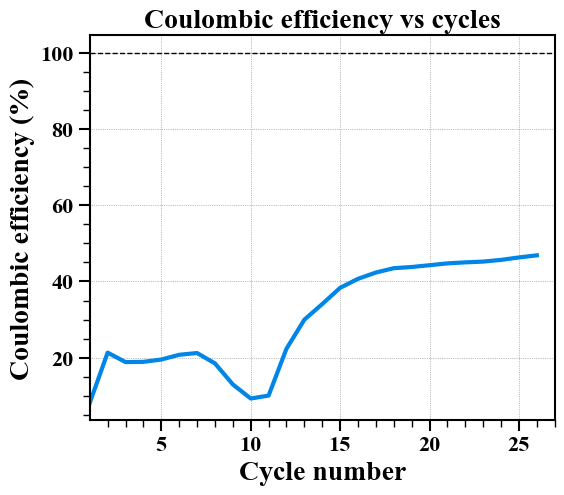

In [343]:
same_plot = False


# color_ch = '#1672c0'        # blue
# color_disch = '#c01672'     # magenta

color_ch = 'black'
color_disch = 'black'

# color_ch = '#fa9e96'        # light pink
# color_disch = '#8eb4d5'     # light blue

# color_ch = '#a9e46c'          # light green
# color_disch = '#c197ec'       # purple

# linestyle1 = '-'
# linestyle2 = '-'

linestyle1 = (0, (1,1))
linestyle2 = 'solid'


# color_CE = '#72c016'      # green
color_CE = '#0086E6'      # blue
CE_100pc_line = True


if same_plot:
    fig = plt.figure()
    ax1 = fig.add_subplot(111, 
    xlabel='Cycle number', 
    ylabel='Capacity (mAh)', 
    # title='Capacity vs cycles', 
    xlim=[1, max(len(ch_data), len(disch_data))],
    ylim=[0, 1.05*max(max(ch_data['cap']), max(disch_data['cap']))])


    l_ch, = ax1.plot(np.arange(1, len(ch_data)+1) , ch_data['cap'], 
    label='Charge', color=color_ch, linestyle=linestyle1)

    l_disch, = ax1.plot(np.arange(1, len(disch_data)+1), disch_data['cap'], 
    label='Discharge', color=color_disch, linestyle=linestyle2)

    # Plot CE vs cycles
    ax2 = ax1.twinx()
    l_CE, = ax2.plot(np.arange(1, len(ce_data)+1), ce_data['CE'], 
    label='CE', linestyle='solid', color=color_CE)
    if CE_100pc_line:
        ax2.axhline(y=100, color='k', linestyle='dashed', linewidth=0.75)
    ax2.set_ylabel('Coulombic efficiency (%)')


    ax1.minorticks_on()
    ax2.minorticks_on()
    plt.legend([l_ch, l_disch, l_CE], ['Charge', 'Discharge', 'Coulombic efficiency'], loc='best')
    ax1.grid(axis="both", color="black", alpha=.5, linewidth=.5, linestyle=":")


    plt.savefig('pretty_plots/cap_CE_vs_cycles.png', dpi=300, bbox_inches='tight')
    plt.show()

else:
    fig = plt.figure()
    ax1 = fig.add_subplot(111,
    xlabel='Cycle number',
    ylabel='Capacity (mAh)',
    title='Capacity vs cycles',
    xlim=[1, max(len(ch_data), len(disch_data))],
    ylim=[0, 1.05*max(max(ch_data['cap']), max(disch_data['cap']))])

    # Plot lines for charge and discharge
    l_ch = ax1.plot(np.arange(1, len(ch_data)+1) , ch_data['cap'], 
    linestyle=linestyle1, color=color_ch, label='Charge')
    l_disch, = ax1.plot(np.arange(1, len(disch_data)+1), disch_data['cap'], 
    linestyle=linestyle2, color=color_disch, label='Discharge')

    plt.legend(loc='best')
    ax1.minorticks_on()
    ax1.grid(axis="both", color="black", alpha=.5, linewidth=.5, linestyle=":")
    fig.savefig('pretty_plots/cap_vs_cycles.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()




    # Plot Coulombic efficiency vs cycles
    fig = plt.figure()
    ax1 = fig.add_subplot(111,
    xlabel='Cycle number',
    ylabel='Coulombic efficiency (%)',
    title='Coulombic efficiency vs cycles',
    xlim=[1, max(len(ch_data), len(disch_data))])


    ax1.plot(np.arange(1, len(ce_data)+1), ce_data['CE'],
    linestyle='solid', color=color_CE)
    if CE_100pc_line:
        ax1.axhline(y=100, color='k', linestyle='dashed', linewidth=1)
    ax1.minorticks_on()
    ax1.grid(axis="both", color="black", alpha=.5, linewidth=.5, linestyle=":")
    fig.savefig('pretty_plots/CE_vs_cycles.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()


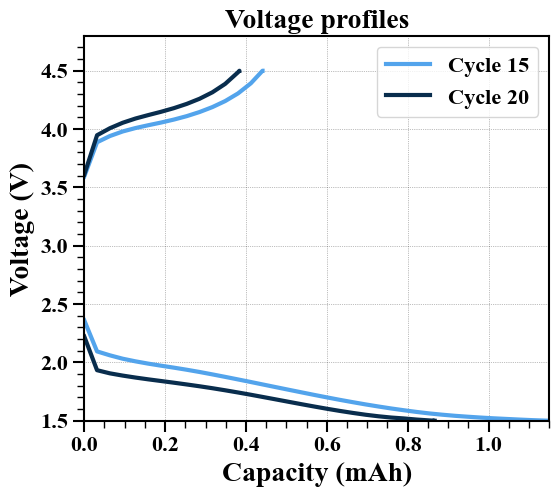

In [344]:
cycle_nums = [15, 20]
voltage_limits = [1.5, 4.8]
color1 = '#53a4ec'
color2 = '#092d4d'
savefig = False
filename = 'pretty_plots/select_profiles'
for cycle in cycle_nums:
    filename += '_'+str(cycle)
filename += '.png'

if True:
    fig = plt.figure()
    ax = fig.add_subplot(111,
    xlabel='Capacity (mAh)',
    ylabel='Voltage (V)',
    title='Voltage profiles')

    ch_cap = []
    disch_cap = []
    for index, cycle in enumerate(cycle_nums):
        color = colorFader(color1, color2, mix=index/(len(cycle_nums)-1) )
        ch_data = read_csv('cycles/charge_' + str(cycle) + '.csv', 
        names = ['capacity', 'voltage'])
        disch_data = read_csv('cycles/discharge_' + str(cycle) + '.csv',
        names = ['capacity', 'voltage'])
        ch_cap.append(max(ch_data['capacity']))
        disch_cap.append(max(disch_data['capacity']))

        ax.plot(ch_data['capacity'], ch_data['voltage'], label='Cycle ' + str(cycle),
        linestyle='solid', color=color, linewidth=3)
        ax.plot(disch_data['capacity'], disch_data['voltage'],
        linestyle='solid', color=color, linewidth=3)

    plt.xlim([0, max(max(ch_cap), max(disch_cap))])
    plt.ylim(voltage_limits)
    ax.minorticks_on()
    ax.grid(axis="both", color="black", alpha=.5, linewidth=.5, linestyle=":")
    plt.legend(loc='best')
    if savefig:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

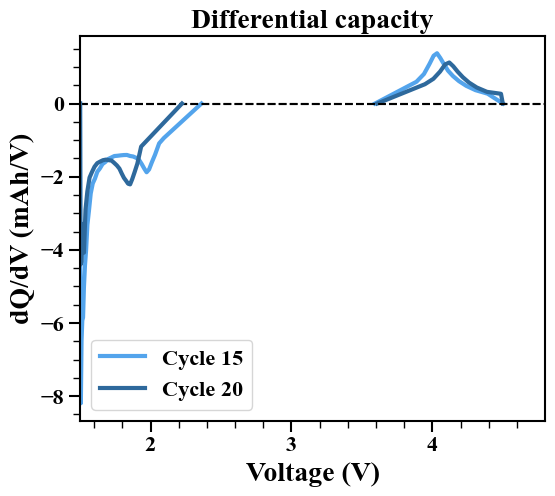

In [345]:
cycle_nums = [15, 20]
voltage_limits = [1.5, 4.8]       # x limits
smooth_type = 'None'           # 'None', 'rolling' or 'savitzky-golay'

dqdv_color1 = '#53a4ec'
dqdv_color2 = '#092d4d'

savefig = False
plot_title = 'Differential capacity'
filename = 'pretty_plots/dQdV'
for cycle in cycle_nums:
    filename += '_'+str(cycle)
filename += '.png'


if True:
    def smoothen_dqdv(data, smooth_type):
        """
        Smoothen the dQ/dV data.
        Currently implements rolling average of 3 and Savitzky-Golay.

        Arguments:
        data -- dataframe with V, dQ/dV as columns
        smooth_type -- string, either 'savitzky-golay' or 'rolling'

        Returns:
        data -- dataframe with V and smoothed dQ/dV as columns.
        """

        if smooth_type == 'rolling':
            data['dqdv'] = data['dqdv'].rolling(3).mean()

        elif smooth_type == 'savitzky_golay':
            raise NotImplementedError

        return data


    fig = plt.figure()
    ax = fig.add_subplot(111,
    xlabel='Voltage (V)',
    ylabel='dQ/dV (mAh/V)',
    title=plot_title,
    xlim=voltage_limits)

    for index, cycle_num in enumerate(cycle_nums):
        color = colorFader(dqdv_color1, dqdv_color2, mix=index/len(cycle_nums))
        # Charge data
        ch_data = read_csv('cycles/charge_'+str(cycle_num)+'_dQdV.csv', 
        names=['voltage', 'dqdv'])
        ch_data = smoothen_dqdv(ch_data, smooth_type)
        plt.plot(ch_data['voltage'], ch_data['dqdv'], label='Cycle '+str(cycle_num),
        linestyle='solid', color=color, linewidth=3)

        # Horizontal line at 0
        plt.axhline(y=0, color='black', linestyle='dashed', linewidth=1.5)

        # Discharge data
        disch_data = read_csv('cycles/discharge_'+str(cycle_num)+'_dQdV.csv', 
        names=['voltage', 'dqdv'])
        disch_data = smoothen_dqdv(disch_data, smooth_type)
        plt.plot(disch_data['voltage'], disch_data['dqdv'],
        linestyle='solid', color=color, linewidth=3)

    plt.legend(loc='best') #, fontsize=15)
    plt.minorticks_on()
    # plt.grid(axis="both", color="black", alpha=.5, linewidth=.5, linestyle=":")
    if savefig:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

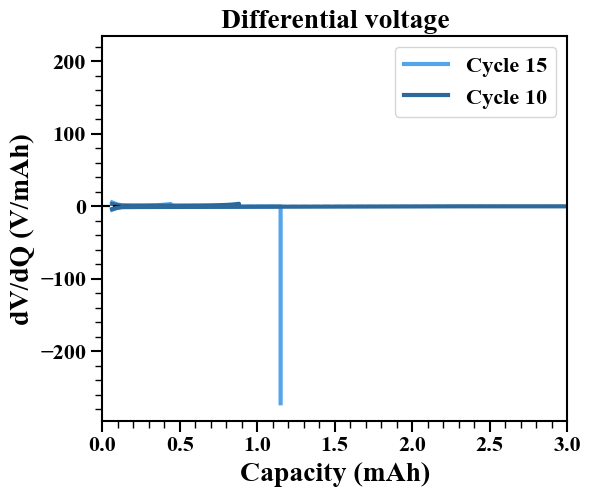

In [346]:
cycle_nums = [15, 10]
voltage_limits = [0, 3]         # x limits
smooth_type = 'rolling'           # 'None', 'rolling' or 'savitzky-golay'

dvdq_color1 = '#53a4ec'
dvdq_color2 = '#092d4d'

savefig = False
plot_title = 'Differential voltage'
filename = 'pretty_plots/dQdV'
for cycle in cycle_nums:
    filename += '_'+str(cycle)
filename += '.png'

if True:
    def smoothen_dvdq(data, smooth_type):
        """
        Smoothen the dQ/dV data.
        Currently implements rolling average of 3 and Savitzky-Golay.

        Arguments:
        data -- dataframe with V, dQ/dV as columns
        smooth_type -- string, either 'savitzky-golay' or 'rolling'

        Returns:
        data -- dataframe with V and smoothed dQ/dV as columns.
        """

        if smooth_type == 'rolling':
            data['dvdq'] = data['dvdq'].rolling(3).mean()

        elif smooth_type == 'savitzky_golay':
            raise NotImplementedError

        return data

    fig = plt.figure()
    ax = fig.add_subplot(111,
    xlabel='Capacity (mAh)',
    ylabel='dV/dQ (V/mAh)',
    title=plot_title,
    xlim=voltage_limits)

    for index, cycle_num in enumerate(cycle_nums):
        color = colorFader(dvdq_color1, dvdq_color2, mix=index/len(cycle_nums))
        # Charge data
        ch_data = read_csv('cycles/charge_'+str(cycle_num)+'_dVdQ.csv', 
        names=['capacity', 'dvdq'])
        ch_data = smoothen_dvdq(ch_data, smooth_type)
        plt.plot(ch_data['capacity'], ch_data['dvdq'], label='Cycle '+str(cycle_num),
        linestyle='solid', color=color, linewidth=3, markersize=15)

        # Horizontal line at 0
        plt.axhline(y=0, color='black', linestyle='dashed', linewidth=1.5)

        # Discharge data
        disch_data = read_csv('cycles/discharge_'+str(cycle_num)+'_dVdQ.csv', 
        names=['capacity', 'dvdq'])
        disch_data = smoothen_dvdq(disch_data, smooth_type)
        plt.plot(disch_data['capacity'], disch_data['dvdq'],
        linestyle='solid', color=color, linewidth=3, markersize=15)


    plt.legend(loc='best') #, fontsize=15)
    plt.minorticks_on()
    if savefig:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()